Cài đặt thư viện cần thiết cho Notebook này !

In [ ]:
!pip install -U mxnet-cu101==1.7.0


# Tiền xử lý dữ liệu (Data Preprocessing)

Trong bài trước (Thao tác với dữ liệu) đã đề cập tới rất nhiều kỹ thuật thao tác dữ liệu được lưu trong dạng `ndarray`. Các bạn có thể xem lại nội dung trong liên kết ([nhấn vào đây](https://colab.research.google.com/drive/1eNroltilDBR3WqAyNYe7pFMUHlxKmxB2?usp=sharing)).

Nhưng để áp dụng Deep Learning vào giải quyết các vấn đề thực tế, ta thường phải bắt đầu bằng việc xử lý dữ liệu thô, chứ không có luôn dữ liệu ngăn nắp được chuẩn bị sẵn trong định dạng `ndarray`. Trong số các công cụ phân tích dữ liệu phổ biến của Python, gói `pandas` khá được ưa chuộng. Cũng như nhiều gói khác trong hệ sinh thái rộng lớn của Python, ‘pandas’ có thể được sử dụng kết hợp với định dạng ndarray. Vì vậy, chúng ta sẽ đi nhanh qua các bước để tiền xử lý dữ liệu thô bằng pandas rồi đổi chúng sang dạng ndarray.

## Đọc tập dữ liệu 

Để lấy ví dụ, ta bắt đầu bằng việc tạo một tập dữ liệu nhân tạo lưu trong file `../data/house_tiny.csv` (csv - comma-separated values - giá trị tách nhau bằng dấu phẩy). Dữ liệu lưu ở các định dạng khác cũng có thể được xử lý tương tự.

Hàm `mkdir_if_not_exist` dưới đây để đảm bảo rằng thư mục `../data` tồn tại.


In [ ]:
import os

def mkdir_if_not_exist(path):  
    """Make a directory if it does not exist."""
    if not isinstance(path, str):
        path = os.path.join(*path)
    if not os.path.exists(path):
        os.makedirs(path)

Sau đây ta ghi tệp dữ liệu vào file csv theo từng hàng một.

In [ ]:
data_file = '../data/house_tiny.csv'
mkdir_if_not_exist('../data')
with open(data_file, 'w') as f:
    f.write('NumRooms,Alley,Price\n')  # Column names
    f.write('NA,Pave,127500\n')  # Each row represents a data example
    f.write('2,NA,106000\n')
    f.write('4,NA,178100\n')
    f.write('NA,NA,140000\n')

Để nạp tập dữ liệu thô từ tệp `csv` vừa được tạo ra, ta dùng gói thư viện `pandas` và gọi hàm `read_csv`. Bộ dữ liệu này có  4  hàng và  3  cột, trong đó mỗi hàng biểu thị số phòng (“NumRooms”), kiểu lối đi (“Alley”), và giá (“Price”) của căn nhà.

In [ ]:
# If pandas is not installed, just uncomment the following line:
# !pip install pandas
import pandas as pd

data = pd.read_csv(data_file)
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


## Xử lý dữ liệu thiếu

Để ý rằng giá trị “**NaN**” là các giá trị bị thiếu. Để xử lý dữ liệu thiếu, các cách thường được áp dụng là quy buộc (`imputation`) và xoá bỏ (`deletion`), trong đó quy buộc thay thế giá trị bị thiếu bằng giá trị khác, trong khi xoá bỏ sẽ bỏ qua các giá trị bị thiếu. Dưới đây chúng ta xem xét phương pháp quy buộc.

Bằng phương pháp đánh chỉ số theo số nguyên (iloc), chúng ta tách data thành inputs (tương ứng với hai cột đầu) và outputs (tương ứng với cột cuối cùng). Với các giá trị số bị thiếu trong inputs, ta thay thế phần tử “**NaN**” bằng giá trị trung bình cộng của cùng cột đó.


In [ ]:
inputs, outputs = data.iloc[:, 0:2], data.iloc[:, 2]
inputs = inputs.fillna(inputs.mean())
print(inputs)

   NumRooms Alley
0       3.0  Pave
1       2.0   NaN
2       4.0   NaN
3       3.0   NaN


Với các giá trị dạng hạng mục hoặc số rời rạc trong inputs, ta coi “**NaN**” là một mục riêng. Vì cột “Alley” chỉ nhận 2 giá trị riêng lẻ là “Pave” (được lát gạch) và “NaN”, pandas có thể tự động chuyển cột này thành 2 cột “Alley_Pave” và “Alley_nan”. Những hàng có kiểu lối đi là “Pave” sẽ có giá trị của cột “Alley_Pave” và cột “Alley_nan” tương ứng là  `1`  và  `0 `. Hàng mà không có giá trị cho kiểu lối đi sẽ có giá trị cột “Alley_Pave” và cột “Alley_nan” lần lượt là  `0`  và  `1` .


In [ ]:
inputs = pd.get_dummies(inputs, dummy_na=True)
print(inputs)

   NumRooms  Alley_Pave  Alley_nan
0       3.0           1          0
1       2.0           0          1
2       4.0           0          1
3       3.0           0          1


## Chuyển sang định dạng ndarray

Giờ thì toàn bộ các giá trị trong inputs và outputs đã ở dạng số, chúng đã có thể được chuyển sang định dạng `ndarray`. 


In [ ]:
from mxnet import np

X, y = np.array(inputs.values), np.array(outputs.values)
X, y

(array([[3., 1., 0.],
        [2., 0., 1.],
        [4., 0., 1.],
        [3., 0., 1.]], dtype=float64),
 array([127500, 106000, 178100, 140000], dtype=int64))

# Làm việc với bộ dữ liệu Tinanic

Chúng ta sẽ cùng bắt tay tìm hiểu cách tiền xử lý bộ dữ liệu [Titanic](https://www.kaggle.com/c/titanic/data) về những người đã lên tàu RMS Titanic năm 1912 và liệu họ có sống sót sau chuyến du ngoạn này hay không. Đây là một tập dữ liệu rất phổ biến và phong phú, rất thích hợp để phân tích khám phá dữ liệu với Pandas.

In [ ]:
import urllib

# Upload data from GitHub to notebook's local drive
url = 'https://raw.githubusercontent.com/madewithml/basics/master/data/titanic.csv'
response = urllib.request.urlopen(url)
html = response.read()
with open('titanic.csv', 'wb') as f:
    f.write(html)

In [ ]:
# Checking if the data was uploaded
!ls -l 

total 88
drwxr-xr-x 1 root root  4096 Sep 16 16:29 sample_data
-rw-r--r-- 1 root root 85153 Sep 23 10:45 titanic.csv


## Load data 

Tải tệp dữ liệu từ CSV vào Pandas Dataframe. `header = 0` biểu thị rằng hàng đầu tiên (index 0) là hàng tiêu đề chứa tên của mỗi cột trong dữ liệu của chúng ta.


In [ ]:
# Read from CSV to Pandas DataFrame
df = pd.read_csv('titanic.csv', header=0)

In [ ]:
# First five items
df.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


Các trường thuộc tính trong bộ dữ liệu:
* **pclass**: hạng vé 
* **name**: tên đầy đủ của khách hàng 
* **sex**: giới tính
* **age**: độ tuổi 
* **sibsp**: số lượng anh/chị/em/... trên tàu 
* **parch**: số lượng cha mẹ / trẻ em ... trên tàu 
* **ticket**: số vé 
* **fare**: giá vé 
* **cabin**: vị trí của phòng 
* **emarked**: cảng mà khách hàng xuống (C - Cherbourg, S - Southampton, Q = Queenstown)
* **survived**: chỉ số sống sót (0 - chết, 1 - sống sót)

## Phân tích dữ liệu 

In [ ]:
import matplotlib.pyplot as plt

Chúng ta có thể sử dụng `.describe()` để xem một số thông tin tiêu chuẩn của bộ dữ liệu.

In [ ]:
# Describe features
df.describe()

,pclass,age,sibsp,parch,fare,survived
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,2.294882,29.881135,0.498854,0.385027,33.295479,0.381971
std,0.837836,14.413500,1.041658,0.865560,51.758668,0.486055
min,1.000000,0.166700,0.000000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,3.000000,39.000000,1.000000,0.000000,31.275000,1.000000
max,3.000000,80.000000,8.000000,9.000000,512.329200,1.000000


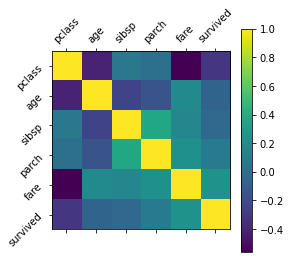

In [ ]:
# Correlation matrix
plt.matshow(df.corr())
continuous_features = df.describe().columns
plt.xticks(range(len(continuous_features)), continuous_features, rotation='45')
plt.yticks(range(len(continuous_features)), continuous_features, rotation='45')
plt.colorbar()
plt.show()

Chúng ta có thể sử dụng `.hist()` để biểu thị biểu đồ histogram cho các thuộc tính.

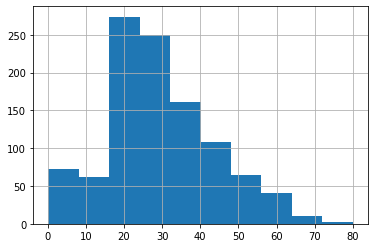

In [ ]:
# Histograms
df['age'].hist()

In [ ]:
# Unique values
df['embarked'].unique()

array(['S', 'C', nan, 'Q'], dtype=object)

## Lọc dữ liệu 

In [ ]:
# Selecting data by feature
df['name'].head()

0                      Allen, Miss. Elisabeth Walton
1                     Allison, Master. Hudson Trevor
2                       Allison, Miss. Helen Loraine
3               Allison, Mr. Hudson Joshua Creighton
4    Allison, Mrs. Hudson J C (Bessie Waldo Daniels)
Name: name, dtype: object

In [ ]:
# Filtering
df[df['sex']=='female'].head() # only the female data appear

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,1
2,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S,0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S,0
6,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S,1
8,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0,2,0,11769,51.4792,C101,S,1


## Sắp xếp dữ liệu 

In [ ]:
# Sorting
df.sort_values('age', ascending=False).head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
14,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,1
61,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S,1
1235,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S,0
135,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,0
9,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,0


## Nhóm dữ liệu 

In [ ]:
# Grouping
survived_group = df.groupby('survived')
survived_group.mean()

,pclass,age,sibsp,parch,fare
survived,,,,,
0,2.500618,30.545369,0.521632,0.328801,23.353831
1,1.962000,28.918228,0.462000,0.476000,49.361184


## Chỉ mục 

Chúng ta có thể sử dụng `.iloc` để lấy dữ liệu theo các hàng hoặc cột và vị trí cụ thể trong `dataframe`.

In [ ]:
# Selecting row 0
df.iloc[0, :] 

pclass                                  1
name        Allen, Miss. Elisabeth Walton
sex                                female
age                                    29
sibsp                                   0
parch                                   0
ticket                              24160
fare                              211.338
cabin                                  B5
embarked                                S
survived                                1
Name: 0, dtype: object

In [ ]:
# Selecting a specific value
df.iloc[0, 1]

'Allen, Miss. Elisabeth Walton'

## Tiền xử lý dữ liệu 

Sau khi đã tìm hiểu về bộ dữ liệu của chúng ta chứa những thông tin gì, ta có thể tiền xử lý loại bỏ các giá trị **NaN**, dư thừa, chuyển dữ liệu chữ về số, v.v...

In [ ]:
# Rows with at least one NaN value
df[pd.isnull(df).any(axis=1)].head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
9,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,0
13,1,"Barber, Miss. Ellen ""Nellie""",female,26.0,0,0,19877,78.8500,NaN,S,1
15,1,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,0
23,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C,1
25,1,"Birnbaum, Mr. Jakob",male,25.0,0,0,13905,26.0000,NaN,C,0


In [ ]:
# Drop rows with Nan values
df = df.dropna() # removes rows with any NaN values
df = df.reset_index() # reset's row indexes in case any rows were dropped
df.head()

,index,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,survived
0,0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,1
2,2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,0
3,3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,0
4,4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,0


In [ ]:
# Dropping multiple columns
df = df.drop(['name', 'cabin', 'ticket'], axis=1) # we won't use text features for our initial basic models
df.head()

,index,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,0,1,female,29.0000,0,0,211.3375,S,1
1,1,1,male,0.9167,1,2,151.5500,S,1
2,2,1,female,2.0000,1,2,151.5500,S,0
3,3,1,male,30.0000,1,2,151.5500,S,0
4,4,1,female,25.0000,1,2,151.5500,S,0


In [ ]:
# Map feature values
df['sex'] = df['sex'].map( {'female': 0, 'male': 1} ).astype(int)
df['embarked'] = df['embarked'].dropna().map( {'S':0, 'C':1, 'Q':2} ).astype(int)
df.head()

,index,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,0,1,0,29.0000,0,0,211.3375,0,1
1,1,1,1,0.9167,1,2,151.5500,0,1
2,2,1,0,2.0000,1,2,151.5500,0,0
3,3,1,1,30.0000,1,2,151.5500,0,0
4,4,1,0,25.0000,1,2,151.5500,0,0


## Feature engineering

Bây giờ chúng ta sẽ sử dụng kỹ thuật trích rút các Feature để tạo một cột mới là `family_size`. Đầu tiên chúng ta sẽ xác định một hàm có tên là `get_family_size` sẽ xác định quy mô của gia đình. Trong đó `quy mô gia đình = số lượng anh chị em + số lượng cha mẹ`.

In [ ]:
# Lambda expressions to create new features
def get_family_size(sibsp, parch):
    family_size = sibsp + parch
    return family_size

Khi chúng ta đã định nghĩa xong hàm bên trên, chúng ta có thể sử dụng `lambda` để `apply` hàm này cho mỗi hàng của dataset.

In [ ]:
df["family_size"] = df[["sibsp", "parch"]].apply(lambda x: get_family_size(x["sibsp"], x["parch"]), axis=1)
df.head()

,index,pclass,sex,age,sibsp,parch,fare,embarked,survived,family_size
0,0,1,0,29.0000,0,0,211.3375,0,1,0
1,1,1,1,0.9167,1,2,151.5500,0,1,3
2,2,1,0,2.0000,1,2,151.5500,0,0,3
3,3,1,1,30.0000,1,2,151.5500,0,0,3
4,4,1,0,25.0000,1,2,151.5500,0,0,3


In [ ]:
# Reorganize headers
df = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'family_size', 'fare', 'embarked', 'survived']]
df.head()

,pclass,sex,age,sibsp,parch,family_size,fare,embarked,survived
0,1,0,29.0000,0,0,0,211.3375,0,1
1,1,1,0.9167,1,2,3,151.5500,0,1
2,1,0,2.0000,1,2,3,151.5500,0,0
3,1,1,30.0000,1,2,3,151.5500,0,0
4,1,0,25.0000,1,2,3,151.5500,0,0


## Save data 
Cuôi cùng, chúng ta sẽ lưu bộ dữ liệu của mình lại.

In [ ]:
# Saving dataframe to CSV
df.to_csv('processed_titanic.csv', index=False)

In [ ]:
# See the saved file
!ls -l

total 96
-rw-r--r-- 1 root root  6975 Sep 23 11:00 processed_titanic.csv
drwxr-xr-x 1 root root  4096 Sep 16 16:29 sample_data
-rw-r--r-- 1 root root 85153 Sep 23 10:45 titanic.csv


# Tổng kết

* Cũng như nhiều gói mở rộng trong hệ sinh thái khổng lồ của Python, `pandas` có thể làm việc được với ndarray.
* Phương pháp quy buộc hoặc xoá bỏ có thể dùng để xử lý dữ liệu bị thiếu.

